In [23]:
from imdb import IMDb
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

sns.set()
sns.set_style("white")
sns.set_context("notebook", font_scale=1.25)

bar_color = '#E5989B'
top_bar_text_color = '#6D6875'

In [5]:
ia = IMDb()
rp = ia.get_movie('1353056')
ia.update(rp, ['episodes', 'vote details'])

In [6]:
season = []
title = []
rating = []
ep = []
votes = []

for s in rp['episodes']:
    for i, e in rp['episodes'][s].items():
        season.append(s)
        title.append(e['title'])
        rating.append(e['rating'])
        votes.append(e['votes'])
        ep.append(i)

df = pd.DataFrame(list(zip(title, season, ep, rating, votes)), columns = ['Title', 'Season', 'Episode', 'Rating', 'Votes'])
df.head(10)

,Title,Season,Episode,Rating,Votes
0,I'm That Bitch,12,1,8.901235,307
1,You Don't Know Me,12,2,7.701235,196
2,World's Worst,12,3,5.501235,233
3,The Ball Ball,12,4,6.501235,208
4,Gay's Anatomy,12,5,7.401235,180
5,Snatch Game,12,6,8.401235,194
6,Madonna: The Unauthorized Rusical,12,7,8.801235,213
7,Droop,12,8,7.401235,155
8,Choices 2020,12,9,7.401235,169
9,Superfan Makeover,12,10,8.801235,210


### Qual o melhor episódio de cada temporada

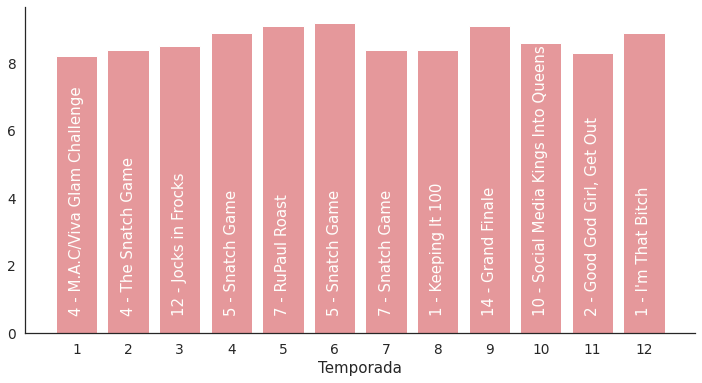

In [27]:
best_eps = df.iloc[df.groupby('Season')['Rating'].idxmax()]

fig, ax = plt.subplots(figsize=(12, 6))
rects = ax.bar(best_eps.Season, best_eps['Rating'], color= bar_color)
for i in range(len(rects)):
        height = rects[i].get_height()
        ax.text(rects[i].get_x() + rects[i].get_width()/2, 0.5,
                str(best_eps.iloc[i, : ]['Episode']) + ' - ' + best_eps.iloc[i, : ]['Title'],
                ha='center', va='bottom', rotation = 90, color='#FFFFFC')

ax.set_xlabel('Temporada')
ax.set_xticks(best_eps.Season)
sns.despine()
plt.show()

### Qual o melhor Snatch Game?

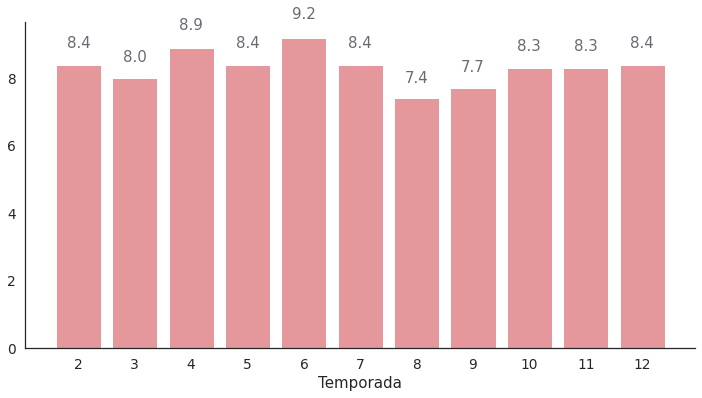

In [35]:
pe = df[df.Title.str.contains('Snatch Game')]
fig, ax = plt.subplots(figsize=(12, 6))

rects = ax.bar(pe.Season, pe['Rating'], color= bar_color)
for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%.1f' % float(height),
                ha='center', va='bottom', color = top_bar_text_color)

ax.set_xlabel('Temporada')
ax.set_xticks(pe.Season)
sns.despine()
plt.show()

### Qual a Melhor Temporada?

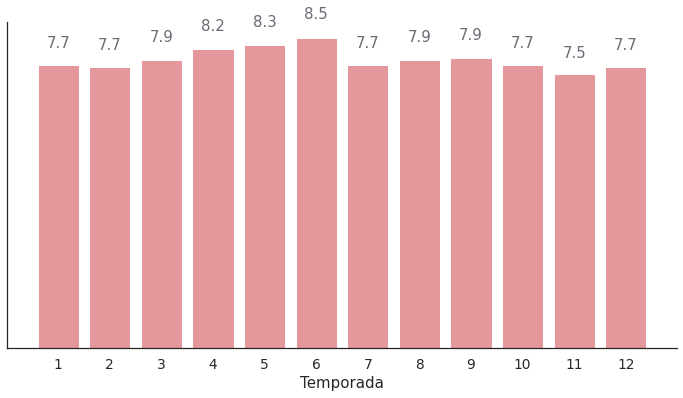

In [46]:
ps = df.groupby(['Season']).median()

fig, ax = plt.subplots(figsize=(12, 6))

rects = ax.bar(ps.index, ps['Rating'], color= bar_color)
for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%.1f' % float(height),
                ha='center', va='bottom', color = top_bar_text_color)
    
ax.set_xlabel('Temporada')
ax.set_xticks(ps.index)
ax.get_yaxis().set_visible(False)
sns.despine()
plt.show()